<a href="https://colab.research.google.com/github/vaishnavichiluk/vaishnavichiluk/blob/main/welding%20yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import os
import random
import cv2
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the zip file in your Google Drive
zip_file_path = '/content/drive/MyDrive/The Welding Defect Dataset1.zip'

# Define the folder where you want to extract the contents
extract_to_folder = '/content/drive/MyDrive/The Welding Defect Dataset'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_folder)

# Verify the extraction by listing the files
print(f"Extracted files to {extract_to_folder}:")
print(os.listdir(extract_to_folder))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extracted files to /content/drive/MyDrive/The Welding Defect Dataset:
['The Welding Defect Dataset', 'The Welding Defect Dataset - v2']


In [5]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [6]:
def visualize_random_train_image_with_bboxes(dataset_folder):
    # Define the path to the train image and label folders
    train_image_folder = os.path.join(dataset_folder, 'train/images')
    train_label_folder = os.path.join(dataset_folder, 'train/labels')

    # Get a list of all image files in the train folder
    image_files = [f for f in os.listdir(train_image_folder) if f.endswith('.jpg')]

    # Randomly select an image file
    selected_image_file = random.choice(image_files)

    # Construct the full path to the image file
    image_path = os.path.join(train_image_folder, selected_image_file)

    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display with matplotlib

    # Construct the path to the corresponding label file
    label_file = selected_image_file.replace('.jpg', '.txt')
    label_path = os.path.join(train_label_folder, label_file)

    # Load the labels and draw the bounding boxes
    with open(label_path, 'r') as f:
        labels = f.readlines()

    # Load the class names from the YAML file
    class_names = ['Bad Weld', 'Good Weld', 'Defect']

    for label in labels:
        label_data = label.strip().split()
        class_id = int(label_data[0])  # The class ID from the label file (first integer)
        x_center, y_center, width, height = map(float, label_data[1:])

        # Convert normalized coordinates to actual pixel values
        img_height, img_width, _ = image.shape
        x_center *= img_width
        y_center *= img_height
        width *= img_width
        height *= img_height

        # Calculate the top-left corner of the bounding box
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)

        # Draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

        # Put the label text using the correct class name
        label_text = class_names[class_id]
        cv2.putText(image, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

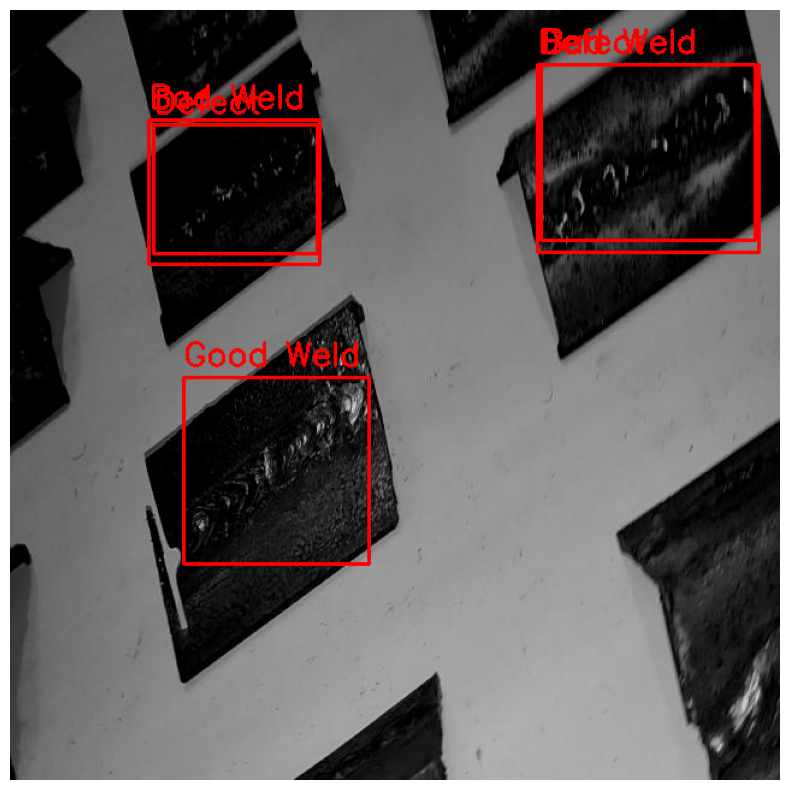

In [7]:
visualize_random_train_image_with_bboxes('/content/drive/MyDrive/The Welding Defect Dataset/The Welding Defect Dataset/The Welding Defect Dataset')

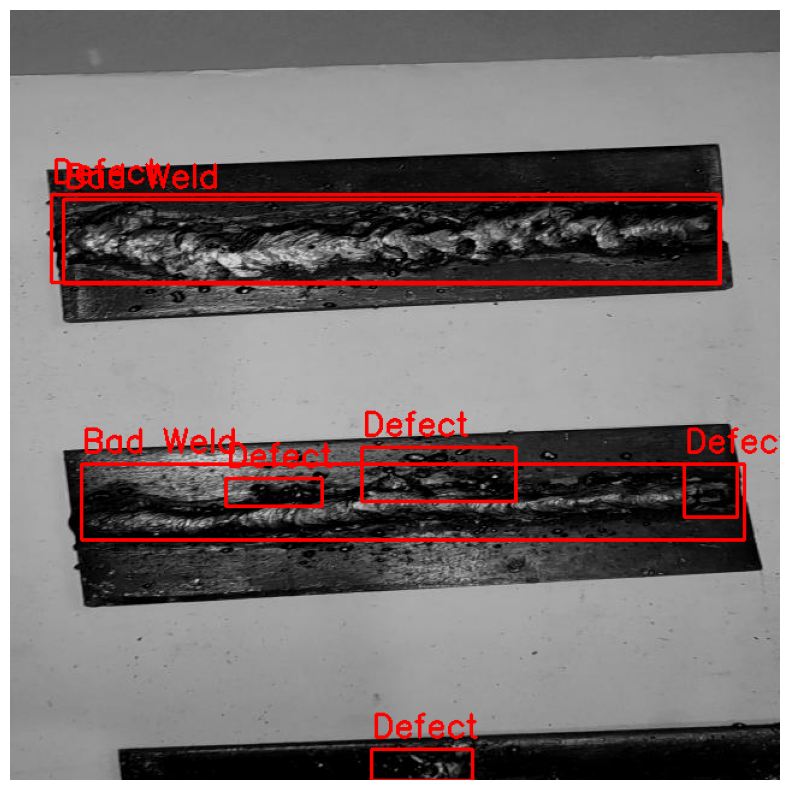

In [8]:
visualize_random_train_image_with_bboxes('/content/drive/MyDrive/The Welding Defect Dataset/The Welding Defect Dataset/The Welding Defect Dataset')

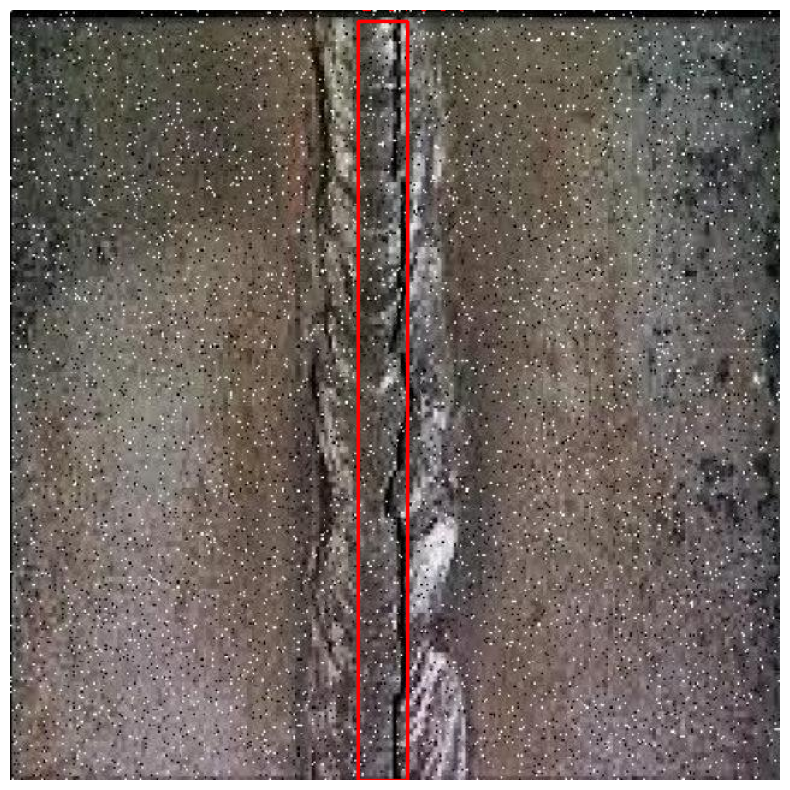

In [9]:
visualize_random_train_image_with_bboxes('/content/drive/MyDrive/The Welding Defect Dataset/The Welding Defect Dataset/The Welding Defect Dataset')

In [10]:
# Define the path to your image file
image_path = '/content/drive/MyDrive/The Welding Defect Dataset/The Welding Defect Dataset/The Welding Defect Dataset/train/images/1723687d-6dd44d6e-Centerline-Crack_jpg.rf.75077a629254ee69b86db34ccacb314f.jpg'

# Load the image
img = cv2.imread(image_path)

# Get the image size (height, width, channels)
height, width, channels = img.shape

print(f"Image size: {width} x {height}")

Image size: 640 x 640


In [11]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 21.2 MB/s eta 0:00:00


In [13]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 139MB/s]


In [21]:
yaml_content = """
train: /content/drive/MyDrive/The Welding Defect Dataset/The Welding Defect Dataset/The Welding Defect Dataset/train/images
val:   /content/drive/MyDrive/The Welding Defect Dataset/The Welding Defect Dataset/The Welding Defect Dataset/valid/images
test:  /content/drive/MyDrive/The Welding Defect Dataset/The Welding Defect Dataset/The Welding Defect Dataset/test/images

nc: 3
names: ['Bad Weld', 'Good Weld', 'Defect']
"""

# Define the path where you want to save the YAML file
yaml_file_path = '/content/drive/MyDrive/The Welding Defect Dataset/The Welding Defect Dataset/The Welding Defect Dataset/data.yaml'

# Save the YAML content to a file
with open(yaml_file_path, 'w') as file:
    file.write(yaml_content)


In [23]:
model.train(data='/content/drive/MyDrive/The Welding Defect Dataset/The Welding Defect Dataset/The Welding Defect Dataset/data.yaml', epochs=5, imgsz=160)

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/The Welding Defect Dataset/The Welding Defect Dataset/The Welding Defect Dataset/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=160, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=F

train: Scanning /content/drive/MyDrive/The Welding Defect Dataset/The Welding Defect Dataset/The Welding Defect Dataset/train/labels.cache... 839 images, 0 backgrounds, 0 corrupt: 100%|██████████| 839/839 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/The Welding Defect Dataset/The Welding Defect Dataset/The Welding Defect Dataset/valid/labels.cache... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<?, ?it/s]

Plotting labels to runs/detect/train6/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 160 train, 160 val
Using 0 dataloader workers
Logging results to runs/detect/train6
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      2.112      2.028      1.255         35        160: 100%|██████████| 53/53 [01:13<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.34s/it]

                   all        176        573      0.345      0.393      0.258      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.923      1.927       1.21         26        160: 100%|██████████| 53/53 [01:19<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.14s/it]

                   all        176        573      0.259      0.347      0.243      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.956      1.892      1.217         54        160: 100%|██████████| 53/53 [01:12<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.62s/it]

                   all        176        573      0.535       0.33      0.207     0.0834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.983      1.892      1.237         38        160: 100%|██████████| 53/53 [01:05<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.21s/it]

                   all        176        573      0.336      0.438      0.267      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.904      1.811      1.186         45        160: 100%|██████████| 53/53 [01:06<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.12s/it]

                   all        176        573      0.529      0.358       0.31      0.156



5 epochs completed in 0.113 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.41s/it]


                   all        176        573      0.528       0.36       0.31      0.156
              Bad Weld         87        127      0.377      0.504      0.375      0.193
             Good Weld        119        253      0.479      0.561      0.468      0.243
                Defect         90        193      0.729     0.0142     0.0862     0.0332
Speed: 0.2ms preprocess, 27.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c4ae11700a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [26]:
metrics = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/drive/MyDrive/The Welding Defect Dataset/The Welding Defect Dataset/The Welding Defect Dataset/valid/labels.cache... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.53it/s]


                   all        176        573      0.528       0.36       0.31      0.156
              Bad Weld         87        127      0.377      0.504      0.375      0.193
             Good Weld        119        253      0.479      0.561      0.468      0.243
                Defect         90        193      0.729     0.0142     0.0862     0.0332
Speed: 0.2ms preprocess, 21.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train62



image 1/1 /content/drive/MyDrive/The Welding Defect Dataset/The Welding Defect Dataset/The Welding Defect Dataset/test/images/Good-Welding-images_12_jpeg_jpg.rf.9fa5a26596733b74baf1f974b8210c28.jpg: 160x160 1 Good Weld, 28.2ms
Speed: 0.7ms preprocess, 28.2ms inference, 6.4ms postprocess per image at shape (1, 3, 160, 160)


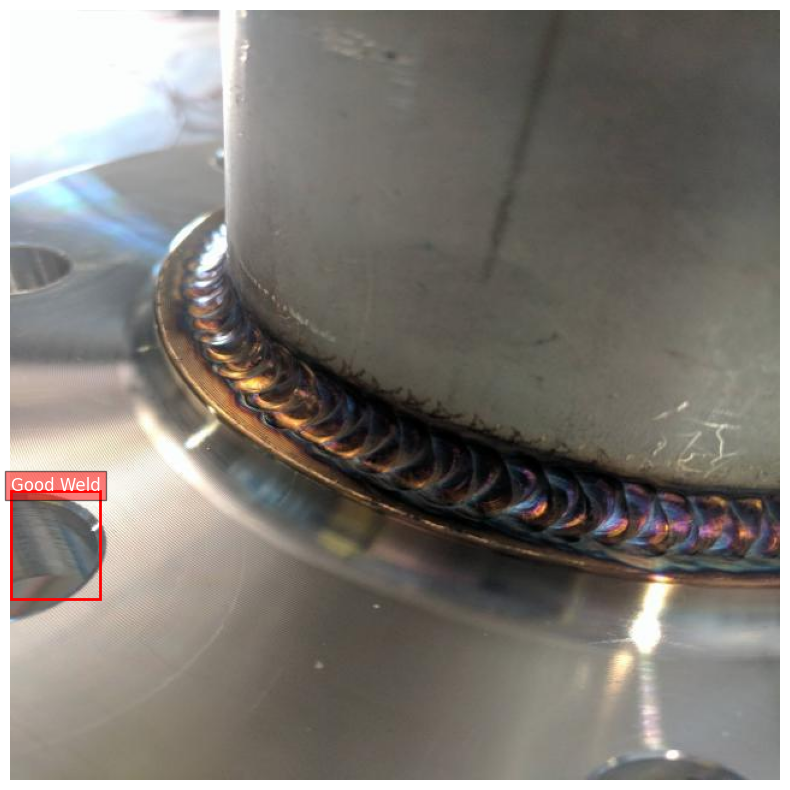

Predicted class 1: Good Weld


In [24]:
test_image_path = '/content/drive/MyDrive/The Welding Defect Dataset/The Welding Defect Dataset/The Welding Defect Dataset/test/images/Good-Welding-images_12_jpeg_jpg.rf.9fa5a26596733b74baf1f974b8210c28.jpg'

results = model(test_image_path)

# Extract the results
boxes = results[0].boxes  # Bounding boxes
classes = results[0].names  # Class names
class_ids = boxes.cls.tolist()  # Class IDs

# Display the image with bounding boxes
img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying with matplotlib

# Plot the image with bounding boxes and labels
plt.figure(figsize=(10, 10))
plt.imshow(img)

for box in boxes:
    # Extract bounding box coordinates
    x1, y1, x2, y2 = map(int, box.xyxy[0])

    # Extract the predicted class ID
    class_id = int(box.cls[0])

    # Get the class name
    class_name = classes[class_id]

    # Draw the bounding box and label on the image
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='red', linewidth=2))
    plt.text(x1, y1, class_name, color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')
plt.show()

# Print the predicted classes
for i, class_id in enumerate(class_ids):
    print(f"Predicted class {i+1}: {classes[int(class_id)]}")


In [27]:
from ultralytics import YOLO

In [41]:
def preprocess_image(image_path, input_size=(160, 160)):
    # Read the image
    img = cv2.imread(image_path)

    # Resize the image
    img = cv2.resize(img, input_size)

    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to [0, 1]
    img = img.astype(np.float32) / 255.0

    # Transpose the image from HWC to CHW format
    img = img.transpose(2, 0, 1)

    # Add batch dimension
    img = np.expand_dims(img, axis=0)

    return img

In [45]:
!pip install opencv-python

import cv2
import numpy as np

def preprocess_image(image_path, input_size=(160, 160)):
    """
    Preprocesses an image for inference.

    Args:
        image_path (str): Path to the image file.
        input_size (tuple): Desired size of the output image (height, width).

    Returns:
        np.ndarray: Preprocessed image.
    """

    # Read the image
    img = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Could not read image from {image_path}. Please check the path.")
        return None  # Or raise an exception, or handle the error in another way

    # Resize the image
    img = cv2.resize(img, input_size)

    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to [0, 1]
    img = img.astype(np.float32) / 255.0

    # Transpose the image from HWC to CHW format
    img = img.transpose(2, 0, 1)

    # Add batch dimension
    img = np.expand_dims(img, axis=0)

    return img

# Example usage:
image_path = '/content/drive/MyDrive/The Welding Defect Dataset/The Welding Defect Dataset/test/images/Good-Welding-images_12_jpeg_jpg.rf.9fa5a26596733b74baf1f974b8210c28.jpg'
preprocessed_image = preprocess_image(image_path)

# Check if preprocessing was successful before accessing shape
if preprocessed_image is not None:
    print("Preprocessed image shape:", preprocessed_image.shape)
else:
    print("Image preprocessing failed.")

Preprocessed image shape: (1, 3, 160, 160)
